### 11.1.1. 优化的目标

In [1]:
%matplotlib inline
import numpy as np
import mindspore
from mpl_toolkits import mplot3d
from d2l import mindspore as d2l

In [2]:
def f(x):
    return x * d2l.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * d2l.cos(5 * np.pi * x)

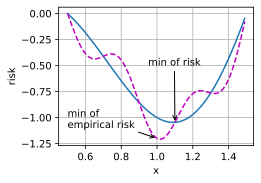

In [3]:
def annotate(text, xy, xytext):  #@save
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='->'))

x = d2l.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

### 11.1.2. 深度学习中的优化挑战

#### 11.1.2.1. 局部最小值

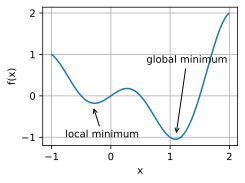

In [4]:
x = d2l.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

#### 11.1.2.2. 鞍点

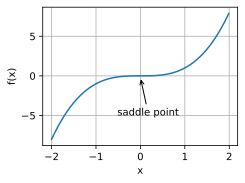

In [5]:
x = d2l.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0, -0.2), (-0.52, -5.0))

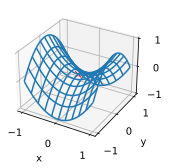

In [6]:
from mindspore import Tensor

x, y = d2l.meshgrid(
        (d2l.linspace(Tensor(-1.0), Tensor(1.0), 101), d2l.linspace(Tensor(-1.0), Tensor(1.0), 101)))
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y');

#### 11.1.2.3. 梯度消失

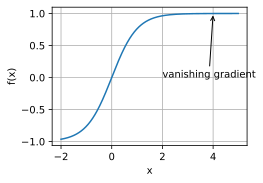

In [7]:
x = d2l.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [d2l.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))